In [ ]:
from nltk.corpus import sentiwordnet as swn
import random
from sklearn import svm
import nltk
import re
#from emoji import UNICODE_EMOJI
from nltk.stem.snowball import SnowballStemmer
import os
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pip install emoji

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import emoji

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
tweets = pd.read_csv(r'/content/drive/MyDrive/SentimentAnalysis/TWEETs.csv',delimiter='\t',header=None)
tweets.head()

,0
0,All of these @DaleJr tweets have me like 😭 #Fo...
1,— 100 💟 ;; Thank you for keeping my DM alive ...
2,@MissJLG20 Hey Jennifer! That's great.\r\n10 f...
3,@fr8ordie @TuckerCarlson @FoxNews Sorry for br...
4,All that pillow talking shit dead 😭 Fr let me ...


In [ ]:
tweets.count()

0    14095
dtype: int64

In [ ]:
# Creating function to extract Twitter_Id and Tweets
def extract_id(tweet):
    words = tweet.split()
    if words and words[0].startswith('@'):
        return words[0]
    return ''

tweets['Twitter_ID'] = tweets[0].apply(extract_id)
tweets['Tweet_Text'] = tweets[0].apply(lambda tweet: ' '.join(tweet.split()[1:]))
tweets.drop(columns=[0], inplace=True)

print(tweets)


       Twitter_ID                                         Tweet_Text
0                  of these @DaleJr tweets have me like 😭 #Foreve...
1                  100 💟 ;; Thank you for keeping my DM alive des...
2      @MissJLG20  Hey Jennifer! That's great. 10 for $35 at VS t...
3       @fr8ordie  @TuckerCarlson @FoxNews Sorry for bringing edu...
4                  that pillow talking shit dead 😭 Fr let me know...
...           ...                                                ...
14090              ki kuss tumhari. Now take this bullshit you lo...
14091              (formerly of Swans) and Suso (Liverpool now AC...
14092                                         follow me please? 😧,,,
14093              know what i think? you look exceptional for a ...
14094                            photobombed my bluebells photo 😔,,,

[14095 rows x 2 columns]


In [ ]:
newdf=tweets[['Tweet_Text']]

In [ ]:
newdf.head()

,Tweet_Text
0,of these @DaleJr tweets have me like 😭 #Foreve...
1,100 💟 ;; Thank you for keeping my DM alive des...
2,Hey Jennifer! That's great. 10 for $35 at VS t...
3,@TuckerCarlson @FoxNews Sorry for bringing edu...
4,that pillow talking shit dead 😭 Fr let me know...


In [ ]:
# remove @
newdf['Tweet_Text'] = newdf['Tweet_Text'].str.replace(r'@[a-zA-Z0-9_]+', ' ')

#remove special characters
newdf['Tweet_Text'] = newdf['Tweet_Text'].str.replace(r'[^a-zA-Z0-9\s😀-🙏]', ' ')

#remove urls
newdf['Tweet_Text']= newdf['Tweet_Text'].str.replace(r'http\S+', '')

#converting to lowercase
newdf['Tweet_Text'] = newdf['Tweet_Text'].str.lower()

In [ ]:

# remove url
def rem_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
newdf['Tweet_Text']=newdf['Tweet_Text'].apply(lambda x : rem_URL(x))

In [ ]:

def rem_name(text):
    name=re.compile(r'R?T?.*?@\S+')
    return name.sub(r'',text)
newdf['Tweet_Text']=newdf['Tweet_Text'].apply(lambda x : rem_name(x))

In [ ]:
import string
#remove punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

newdf['Tweet_Text']=newdf['Tweet_Text'].apply(lambda x : remove_punct(x))

In [ ]:
newdf.columns

Index(['Tweet_Text'], dtype='object')

In [ ]:
newdf.head()

,Tweet_Text
0,of these tweets have me like 😭 foreverafan ...
1,100 thank you for keeping my dm alive des...
2,hey jennifer that s great 10 for 35 at vs t...
3,sorry for bringing education into it 😜
4,that pillow talking shit dead 😭 fr let me know...


In [ ]:
newdf.count()

Tweet_Text    14095
dtype: int64

In [ ]:
import re

# Extracting emojis using regex
def extract_emojis(text):
    emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001F004-\U0001F0CF\U0001F170-\U0001F251]+', flags=re.UNICODE)
    emojis = ''.join(emoji_pattern.findall(text))
    return emojis

newdf['Emojis'] = newdf['Tweet_Text'].apply(extract_emojis)
eg = "I love Manchester! 😃💟"
result = extract_emojis(eg)

print(result)


😃💟


In [ ]:
newdf = newdf[newdf['Emojis'] != '']



In [ ]:
import pandas as pd
import regex as re


#checking if a tweet has exactly one emoji
def has_one_emoji(text):
    emoji_pattern = re.compile(r'\p{Emoji}', re.UNICODE)
    emojis = emoji_pattern.findall(text)
    return len(emojis) == 1

newdf = newdf[newdf['Tweet_Text'].apply(has_one_emoji)].reset_index(drop=True)

In [ ]:
newdf.head()

,Tweet_Text,Emojis
0,sorry for bringing education into it 😜,😜
1,that pillow talking shit dead 😭 fr let me know...,😭
2,i saw was helga rescuing gerald s shoe 😂 the p...,😂
3,im convinced u dont get enough 😕 but u talkin ...,😕
4,must be spooning velcro girl so 😜,😜


In [ ]:
# keeping text
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Enclosed Alphanumeric Supplement
                           u"\U0001F170-\U0001F251"  # Enclosed Ideographic Supplement
                           u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
onlytext = [remove_emojis(t).strip() for t in newdf['Tweet_Text']]
newdf['onlytext']=onlytext

In [ ]:
newdf.count()

Tweet_Text    8961
Emojis        8961
onlytext      8961
dtype: int64

In [ ]:
joy = ['\U0001F600', '\U0001F602', '\U0001F603', '\U0001F604',
          '\U0001F606', '\U0001F607', '\U0001F609', '\U0001F60A',
          '\U0001F60B', '\U0001F60C', '\U0001F60D', '\U0001F60E',
          '\U0001F60F', '\U0001F31E', '\U0000263A', '\U0001F618',
          '\U0001F61C', '\U0001F61D', '\U0001F61B', '\U0001F63A',
          '\U0001F638', '\U0001F639', '\U0001F63B', '\U0001F63C',
          '\U00002764', '\U0001F496', '\U0001F495', '\U0001F601',
          '\U00002665']#joy

anger = ['\U0001F62C', '\U0001F620', '\U0001F610',
          '\U0001F611', '\U0001F620', '\U0001F621', '\U0001F616',
          '\U0001F624', '\U0001F63E']#anger
disgust= ['\U0001F4A9']#disgust
fear = ['\U0001F605', '\U0001F626', '\U0001F627', '\U0001F631',
          '\U0001F628', '\U0001F630', '\U0001F640']#fear
sad = ['\U0001F614', '\U0001F615', '\U00002639', '\U0001F62B',
          '\U0001F629', '\U0001F622', '\U0001F625', '\U0001F62A',
          '\U0001F613', '\U0001F62D', '\U0001F63F', '\U0001F494']#sad
surprise = ['\U0001F633', '\U0001F62F', '\U0001F635', '\U0001F632']#surprise

emojis = joy + anger + disgust + fear + sad + surprise
print(emojis)
print(len(emojis))

['😀', '😂', '😃', '😄', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '🌞', '☺', '😘', '😜', '😝', '😛', '😺', '😸', '😹', '😻', '😼', '❤', '💖', '💕', '😁', '♥', '😬', '😠', '😐', '😑', '😠', '😡', '😖', '😤', '😾', '💩', '😅', '😦', '😧', '😱', '😨', '😰', '🙀', '😔', '😕', '☹', '😫', '😩', '😢', '😥', '😪', '😓', '😭', '😿', '💔', '😳', '😯', '😵', '😲']
62


In [ ]:
# Defining the emoji categories
emoji_categories = {
    'joy': joy,
    'anger': anger,
    'disgust': disgust,
    'fear': fear,
    'sad': sad,
    'surprise': surprise
}

# Function to classify emojis
def classify_emoji(text):
    for category, emojis in emoji_categories.items():
        for emoji in emojis:
            if emoji in text:
                return category
    return 'other'


newdf['Emoji_Type'] = newdf['Tweet_Text'].apply(classify_emoji)



In [ ]:
newdf.head()

,Tweet_Text,Emojis,onlytext,Emoji_Type
0,sorry for bringing education into it 😜,😜,sorry for bringing education into it,joy
1,that pillow talking shit dead 😭 fr let me know...,😭,that pillow talking shit dead fr let me know ...,sad
2,i saw was helga rescuing gerald s shoe 😂 the p...,😂,i saw was helga rescuing gerald s shoe the po...,joy
3,im convinced u dont get enough 😕 but u talkin ...,😕,im convinced u dont get enough but u talkin b...,sad
4,must be spooning velcro girl so 😜,😜,must be spooning velcro girl so,joy


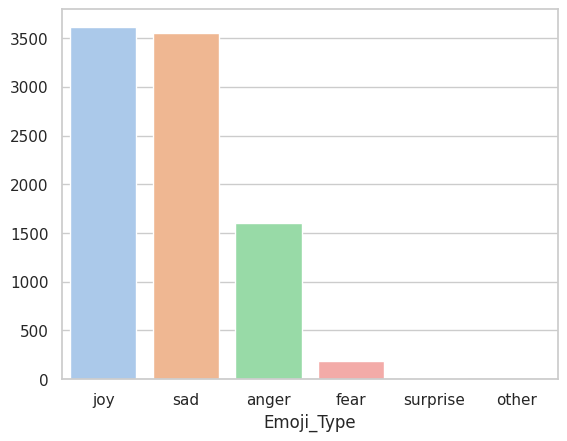

Emoji_Type
joy         3615
sad         3554
anger       1597
fear         184
surprise      10
other          1
dtype: int64

In [ ]:
sns.set(style="whitegrid", color_codes=True)
data = newdf.groupby("Emoji_Type").size().sort_values(ascending = False)
pal = sns.color_palette("pastel", len(data))
sns.barplot(x=data.index, y=data, palette=pal)

plt.show()
data

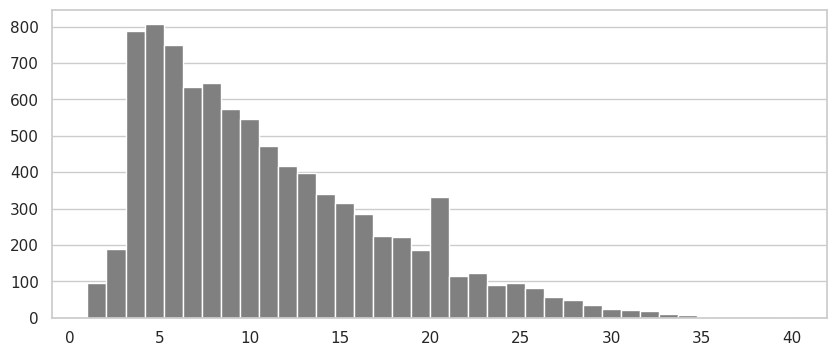

In [ ]:
# words present in tweets
lengths = [len(t.split(' ')) for t in newdf['onlytext']]

plt.figure(figsize=(10,4))
plt.grid(axis = 'x')
plt.hist(lengths, bins = len(set(lengths)),color='gray')
plt.show()

In [ ]:
stopwords = [
    "!!", "?!", "??", "!?", "`", "``", "''", "-lrb-", "-rrb-", "-lsb-", "-rsb-","'",
    ",", ".", ":", ";", "\"", "'", "?", "<", ">", "{", "}", "[", "]", "+", "-", "(", ")", "&", "%", "$", "@", "!", "^", "#", "*",
    "..", "...", "'ll", "'s", "'m", "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any",
    "are", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by",
    "can", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down",
    "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having",
    "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's",
    "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me",
    "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other",
    "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's",
    "should", "shouldn't", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves",
    "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through",
    "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were",
    "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom",
    "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your",
    "yours", "yourself", "yourselves", "###", "return", "arent", "cant", "couldnt", "didnt", "doesnt", "dont", "hadnt",
    "hasnt", "havent", "hes", "heres", "hows", "im", "isnt", "its", "lets", "mustnt", "shant", "shes", "shouldnt",
    "thats", "theres", "theyll", "theyre", "theyve", "wasnt", "were", "werent", "whats", "whens", "wheres", "whos",
    "whys", "wont", "wouldnt","u", "youd", "youll", "youre", "youve"
]


In [ ]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# def clean_text(text):
#     words = nltk.word_tokenize(text)  # Tokenize the text into words
#     words = [word for word in words if word.lower() not in stopwords.words('english') and word not in punctuation]
#     cleaned_text = ' '.join(words)
#     return cleaned_text

# newdf['Tokenized_Text'] = newdf['Tweet_Text'].apply(clean_text)


In [ ]:
newdf.head()

,Tweet_Text,Emojis,onlytext,Emoji_Type
0,sorry for bringing education into it 😜,😜,sorry for bringing education into it,joy
1,that pillow talking shit dead 😭 fr let me know...,😭,that pillow talking shit dead fr let me know ...,sad
2,i saw was helga rescuing gerald s shoe 😂 the p...,😂,i saw was helga rescuing gerald s shoe the po...,joy
3,im convinced u dont get enough 😕 but u talkin ...,😕,im convinced u dont get enough but u talkin b...,sad
4,must be spooning velcro girl so 😜,😜,must be spooning velcro girl so,joy


In [ ]:
# Stopwords remove
from gensim.parsing.preprocessing import remove_stopwords
eg = newdf['Tweet_Text'][3]
print('Original Tweet:',eg)
print('Removing stopwords:',remove_stopwords(eg))
newdf['CleanTweets']=newdf['Tweet_Text'].apply(lambda x : remove_stopwords(x))

Original Tweet: im convinced u dont get enough 😕 but u talkin bout me doe     
Removing stopwords: im convinced u dont 😕 u talkin bout doe


In [ ]:
newdf.head()

,Tweet_Text,Emojis,onlytext,Emoji_Type,CleanTweets
0,sorry for bringing education into it 😜,😜,sorry for bringing education into it,joy,sorry bringing education 😜
1,that pillow talking shit dead 😭 fr let me know...,😭,that pillow talking shit dead fr let me know ...,sad,pillow talking shit dead 😭 fr let know
2,i saw was helga rescuing gerald s shoe 😂 the p...,😂,i saw was helga rescuing gerald s shoe the po...,joy,saw helga rescuing gerald s shoe 😂 poor boy he...
3,im convinced u dont get enough 😕 but u talkin ...,😕,im convinced u dont get enough but u talkin b...,sad,im convinced u dont 😕 u talkin bout doe
4,must be spooning velcro girl so 😜,😜,must be spooning velcro girl so,joy,spooning velcro girl 😜


# **Lemmatization**

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from textblob import TextBlob

def lemm(text):
    textTB = TextBlob(text)
    words = textTB.words
    words_lemmatized = words.lemmatize()
    return ' '.join(words_lemmatized)

eg = newdf['CleanTweets'][34]+ ' looks' + ' books'
print('Original Tweet:',eg)
print('After Lemmatization:',lemm(eg))

Original Tweet: fight think ll hurt somebody 😕 looks books
After Lemmatization: fight think ll hurt somebody 😕 look book


In [ ]:
%time newdf['CleanTweets']=newdf['CleanTweets'].apply(lambda x : lemm(x))

CPU times: user 2.98 s, sys: 11.5 ms, total: 2.99 s
Wall time: 3.76 s


In [ ]:
import re

#emoji pattern using regular expression
emoji_pattern= re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emojis in emoticons
                           u"\U0001F300-\U0001F5FF"  # Other emoticons
                           u"\U0001F680-\U0001F6FF"  # Transport and map symbols
                           u"\U0001F700-\U0001F77F"  # Alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001FB00-\U0001FBFF"  # Symbols for Legacy Computing
                           u"\U0001FC00-\U0001FCFF"  # Symbols for Legacy Computing
                           u"\U0001F004-\U0001F0CF"  # Additional emoticons
                           u"\U0001F170-\U0001F251"  # Enclosed Ideographic Supplement
                           "]+", flags=re.UNICODE)


In [ ]:
#Keeping only emojis and english words
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:


def keepemojienglish(text):
    ls = []
    for w in text.split(' '):
        if w in words:
            ls.append(w)
        elif emoji_pattern.match(w):
            w = ' ' + w + ' '
            ls.append(w)
        else:
            continue
    return ' '.join(ls)

eg = newdf['CleanTweets'][2]+' 괜찮아요 खुश 😅😅'
print('Original Tweet:',eg)
print('After extraction:',keepemojienglish(eg))

Original Tweet: saw helga rescuing gerald s shoe 😂 poor boy helga saying seen better shrine arnold lmao bye 괜찮아요 खुश 😅😅
After extraction: saw s shoe  😂  poor boy saying seen better shrine bye  😅😅 


In [ ]:
newdf['CleanTweets']=newdf['CleanTweets'].apply(lambda x : keepemojienglish(x))

In [ ]:
newdf.head()

,Tweet_Text,Emojis,onlytext,Emoji_Type,CleanTweets
0,sorry for bringing education into it 😜,😜,sorry for bringing education into it,joy,sorry education 😜
1,that pillow talking shit dead 😭 fr let me know...,😭,that pillow talking shit dead fr let me know ...,sad,pillow talking dead 😭 let know
2,i saw was helga rescuing gerald s shoe 😂 the p...,😂,i saw was helga rescuing gerald s shoe the po...,joy,saw s shoe 😂 poor boy saying seen better shr...
3,im convinced u dont get enough 😕 but u talkin ...,😕,im convinced u dont get enough but u talkin b...,sad,convinced u dont 😕 u bout doe
4,must be spooning velcro girl so 😜,😜,must be spooning velcro girl so,joy,spooning girl 😜


In [ ]:
df=newdf[['CleanTweets','Emojis','Emoji_Type','onlytext']]

In [ ]:
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext
0,sorry education 😜,😜,joy,sorry for bringing education into it
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...
4,spooning girl 😜,😜,joy,must be spooning velcro girl so


In [ ]:
#Splitting text and emojis

def emojisplit(text):
    words = []
    for c in text:
        if emoji_pattern.match(c):
            c = ' ' + c + ' '
        words.append(c)
    return ''.join(words)

eg = df['CleanTweets'][3]
print('Original Tweet:',eg)
print('After splitting:',emojisplit(eg))

Original Tweet: convinced u dont  😕  u bout doe
After splitting: convinced u dont   😕   u bout doe


In [ ]:
df['Splitted']=df['CleanTweets'].apply(lambda x : emojisplit(x))

In [ ]:
#dropping these invalid samples
df= df[df.Emojis != '']
df[['CleanTweets','Emojis','Emoji_Type','onlytext','Splitted']]

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜
...,...,...,...,...,...
8956,guy 😧,😧,fear,guys,guy 😧
8957,thanks 😊,😊,joy,thanks fansnim,thanks 😊
8958,guy s come 😊,😊,joy,you guys make the japanese greninja s and wave...,guy s come 😊
8959,follow 😧,😧,fear,follow me please,follow 😧


In [ ]:
def concern_emojis(text):
  return ' '.join(c for c in text if c in emojis)

example = df['CleanTweets'][45]+'😱🫀👾🤖🎃'
print('Example of original Tweet:')
print(example)
print('---------------')
print('Extracting concerned emoji ...')
example = concern_emojis(example)
print(example)

Example of original Tweet:
mate bad influence  😂 😱🫀👾🤖🎃
---------------
Extracting concerned emoji ...
😂 😱


In [ ]:
concerned_emojis = [concern_emojis(t) for t in df['CleanTweets']]
concerned_emojis[:10]

['😜', '😭', '😂', '😕', '😜', '😕', '😭', '😕', '😡', '😂']

In [ ]:
df['concerned_emojis']=[concern_emojis(t) for t in df['CleanTweets']]
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜,😜
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know,😭
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...,😂
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe,😕
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜,😜


In [ ]:
df.tail(5)

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis
8956,guy 😧,😧,fear,guys,guy 😧,😧
8957,thanks 😊,😊,joy,thanks fansnim,thanks 😊,😊
8958,guy s come 😊,😊,joy,you guys make the japanese greninja s and wave...,guy s come 😊,😊
8959,follow 😧,😧,fear,follow me please,follow 😧,😧
8960,bluebell photo 😔,😔,sad,photobombed my bluebells photo,bluebell photo 😔,😔


In [ ]:
# save new csvs
df.to_csv('CLNtweet.csv')

In [ ]:
for i in emoji_categories:
    print('{} category contains {} emojis:'.format(i,len(emoji_categories[i])))
    print(i,emoji_categories[i])

joy category contains 29 emojis:
joy ['😀', '😂', '😃', '😄', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '🌞', '☺', '😘', '😜', '😝', '😛', '😺', '😸', '😹', '😻', '😼', '❤', '💖', '💕', '😁', '♥']
anger category contains 9 emojis:
anger ['😬', '😠', '😐', '😑', '😠', '😡', '😖', '😤', '😾']
disgust category contains 1 emojis:
disgust ['💩']
fear category contains 7 emojis:
fear ['😅', '😦', '😧', '😱', '😨', '😰', '🙀']
sad category contains 12 emojis:
sad ['😔', '😕', '☹', '😫', '😩', '😢', '😥', '😪', '😓', '😭', '😿', '💔']
surprise category contains 4 emojis:
surprise ['😳', '😯', '😵', '😲']


In [ ]:

#get the emoji list
wordslist = []
for t in df['Emojis']:
    t = t.split()
    wordslist += t

wordslist[:3]

['😜', '😭', '😂']

In [ ]:
from collections import Counter

In [ ]:
ls = []
count = Counter(wordslist)
emojis = joy + anger + disgust + fear + sad + surprise
for i in emojis:
    x,y = i,count[i]
    ls.append([x,y])

ls = sorted(ls)
import pandas as pd
emoji_df = pd.DataFrame(ls,columns=['Emoji','Count'])
emoji_df.sort_values(by=['Count'],ascending=False, inplace=True)
emoji_df

,Emoji,Count
28,😕,1801
11,😂,1761
47,😭,1716
36,😡,1593
32,😜,1554
...,...,...
29,😖,0
1,☺,0
33,😝,0
34,😠,0


In [ ]:
emoji_df.to_csv('emojifromdataset.csv')

In [ ]:
# draw the most frequently used emoji:
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='/content/drive/MyDrive/SentimentAnalysis/Euclid Fraktur.ttf')


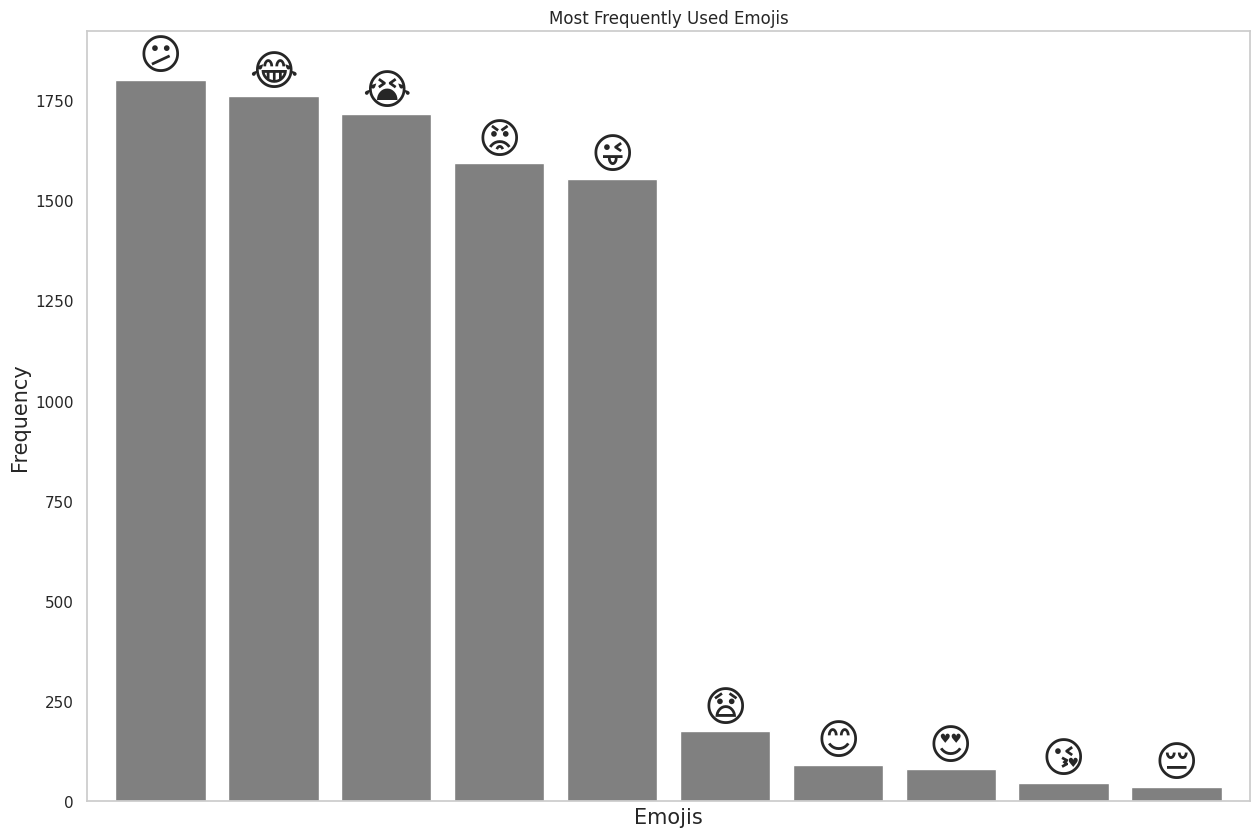

In [ ]:

freqs = emoji_df['Count'][:10]
labels = emoji_df['Emoji'][:10]
# Plot the figure
plt.figure(figsize=(15, 10))
plt.rcParams['font.family'] = prop.get_family()
# plt.grid(axis = 'x')
# plt.bar(labels,freqs,color='pink')
# plt.show()


ax = pd.Series(freqs).plot(kind='bar', color='gray', width=0.8)
ax.set_title('Most Frequently Used Emojis')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Emojis', fontsize=15)
ax.set_facecolor(color='white')
ax.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontproperties=prop.get_name()
    )

plt.show()

In [ ]:
#Topic Model: to identify clusters or groups of similar words within a body of text.

In [ ]:
# prepare emoji list for topic model
elist = [em.split() for em in df['Emojis']]
elist[:10]

[['😜'], ['😭'], ['😂'], ['😕'], ['😜'], ['😕'], ['😭'], ['😕'], ['😡'], ['😂']]

In [ ]:
# train LDA model
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(elist)
corpus = [vocabs.doc2bow(item) for item in elist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=9)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 1.87 s, sys: 12.6 ms, total: 1.89 s
Wall time: 4.47 s
[(0, '0.918*"😍" + 0.035*"😡" + 0.023*"😜" + 0.002*"😧" + 0.001*"😊" + 0.001*"😭" + 0.001*"😕" + 0.001*"😂" + 0.001*"😄" + 0.001*"😆"'), (1, '0.886*"😡" + 0.060*"😏" + 0.034*"😜" + 0.007*"😍" + 0.002*"😘" + 0.001*"😂" + 0.001*"😳" + 0.001*"😧" + 0.001*"😭" + 0.001*"😕"'), (2, '0.984*"😜" + 0.010*"😕" + 0.005*"😡" + 0.000*"😬" + 0.000*"😭" + 0.000*"😂" + 0.000*"😧" + 0.000*"😊" + 0.000*"😍" + 0.000*"😘"'), (3, '0.572*"😧" + 0.299*"😊" + 0.075*"😄" + 0.039*"😆" + 0.006*"😭" + 0.003*"😀" + 0.002*"😕" + 0.001*"😜" + 0.001*"😒" + 0.000*"😍"'), (4, '0.942*"😭" + 0.053*"😔" + 0.003*"😉" + 0.001*"😂" + 0.000*"😡" + 0.000*"😕" + 0.000*"😜" + 0.000*"😧" + 0.000*"😊" + 0.000*"😍"'), (5, '0.958*"😂" + 0.023*"😘" + 0.011*"😭" + 0.006*"😱" + 0.001*"😲" + 0.000*"😔" + 0.000*"😉" + 0.000*"😎" + 0.000*"😡" + 0.000*"😕"'), (6, '0.983*"😕" + 0.006*"😎" + 0.006*"😜" + 0.003*"😡" + 0.000*"😂" + 0.000*"😭" + 0.000*"😧" + 0.000*"😊" + 0.000*"😍" + 0.000*"😘"'), (7, '0.995*"😡" + 0.002*"😳" + 0.000*"😜" + 0.000*

In [ ]:
dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}
for i in range(9):
    key = 'Topic_' + str(i)
    print('Top 10 related emoji in', key)
    print(dict[key])

Top 10 related emoji in Topic_0
['😍', '😡', '😜', '😧', '😊', '😭', '😕', '😂', '😄', '😆']
Top 10 related emoji in Topic_1
['😡', '😏', '😜', '😍', '😘', '😂', '😳', '😧', '😭', '😕']
Top 10 related emoji in Topic_2
['😜', '😕', '😡', '😬', '😭', '😂', '😧', '😊', '😍', '😘']
Top 10 related emoji in Topic_3
['😧', '😊', '😄', '😆', '😭', '😀', '😕', '😜', '😒', '😍']
Top 10 related emoji in Topic_4
['😭', '😔', '😉', '😂', '😡', '😕', '😜', '😧', '😊', '😍']
Top 10 related emoji in Topic_5
['😂', '😘', '😭', '😱', '😲', '😔', '😉', '😎', '😡', '😕']
Top 10 related emoji in Topic_6
['😕', '😎', '😜', '😡', '😂', '😭', '😧', '😊', '😍', '😘']
Top 10 related emoji in Topic_7
['😡', '😳', '😜', '😕', '😭', '😂', '😧', '😊', '😆', '😍']
Top 10 related emoji in Topic_8
['😉', '😭', '😜', '😡', '😬', '😕', '😧', '😊', '😄', '😂']


In [ ]:
#Focusing on concerned emojis

In [ ]:
# prepare emoji list for topic model
ls2 = []
elist = [em.split() for em in df['Emojis']]
for i in elist:
    e = []
    for emo in i:
        if emo in emojis:
            e.append(emo)
    ls2.append(e)

print(elist[:10])
print(ls2[:10])

[['😜'], ['😭'], ['😂'], ['😕'], ['😜'], ['😕'], ['😭'], ['😕'], ['😡'], ['😂']]
[['😜'], ['😭'], ['😂'], ['😕'], ['😜'], ['😕'], ['😭'], ['😕'], ['😡'], ['😂']]


In [ ]:
elist = ls2

In [ ]:
# train LDA model
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(elist)
corpus = [vocabs.doc2bow(item) for item in elist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=6)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 1.84 s, sys: 29.4 ms, total: 1.87 s
Wall time: 4.44 s
[(0, '0.542*"😧" + 0.284*"😊" + 0.071*"😄" + 0.065*"😔" + 0.027*"😘" + 0.004*"😜" + 0.003*"😀" + 0.001*"😡" + 0.001*"😬" + 0.000*"😂"'), (1, '0.989*"😡" + 0.007*"😎" + 0.001*"😜" + 0.001*"😕" + 0.000*"😍" + 0.000*"😳" + 0.000*"😏" + 0.000*"😭" + 0.000*"😂" + 0.000*"😧"'), (2, '0.461*"😍" + 0.287*"😆" + 0.124*"😉" + 0.077*"😏" + 0.014*"😭" + 0.009*"😧" + 0.006*"😡" + 0.005*"😊" + 0.004*"😂" + 0.002*"😄"'), (3, '0.992*"😜" + 0.005*"😂" + 0.000*"😉" + 0.000*"😕" + 0.000*"😭" + 0.000*"😡" + 0.000*"😧" + 0.000*"😊" + 0.000*"😄" + 0.000*"😍"'), (4, '0.497*"😭" + 0.491*"😂" + 0.006*"😕" + 0.003*"😱" + 0.002*"😜" + 0.000*"😘" + 0.000*"😬" + 0.000*"😡" + 0.000*"😧" + 0.000*"😊"'), (5, '0.993*"😕" + 0.002*"😳" + 0.002*"😭" + 0.001*"😲" + 0.000*"😂" + 0.000*"😜" + 0.000*"😡" + 0.000*"😧" + 0.000*"😊" + 0.000*"😄"')]
[(0, 0.08333784), (1, 0.083334014), (2, 0.08333359), (3, 0.5833258), (4, 0.08333538), (5, 0.083333366)]


In [ ]:
# get the top 10 emoji related with each topic
dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}
for i in range(6):
    key = 'Topic_' + str(i)
    print('Top 10 related emoji in', key)
    print(dict[key])

Top 10 related emoji in Topic_0
['😧', '😊', '😄', '😔', '😘', '😜', '😀', '😡', '😬', '😂']
Top 10 related emoji in Topic_1
['😡', '😎', '😜', '😕', '😍', '😳', '😏', '😭', '😂', '😧']
Top 10 related emoji in Topic_2
['😍', '😆', '😉', '😏', '😭', '😧', '😡', '😊', '😂', '😄']
Top 10 related emoji in Topic_3
['😜', '😂', '😉', '😕', '😭', '😡', '😧', '😊', '😄', '😍']
Top 10 related emoji in Topic_4
['😭', '😂', '😕', '😱', '😜', '😘', '😬', '😡', '😧', '😊']
Top 10 related emoji in Topic_5
['😕', '😳', '😭', '😲', '😂', '😜', '😡', '😧', '😊', '😄']


## **WORD EMBEDDINGS**

**Word embedding model only concerned emojis**

In [ ]:
elist=ls2

In [ ]:
from gensim.models import Word2Vec
#model parameters
num_features =30
min_word_count = 5
context = 15
sg = 0

# training the model
%time model_emo = Word2Vec(elist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)


CPU times: user 103 ms, sys: 6.88 ms, total: 110 ms
Wall time: 124 ms


In [ ]:
list = emojis
for i in list:
    try:
        print('Most similar words to '+i+' are:')
        print(model_emo.wv.most_similar(i)[:3])
        print('\n')

    except KeyError:
        print('Emoji {} is not present in the vocabulary\n'.format(i))
        continue


Most similar words to 😀 are:
Emoji 😀 is not present in the vocabulary

Most similar words to 😂 are:
[('😎', 0.34438738226890564), ('😊', 0.29966092109680176), ('😳', 0.1203199103474617)]


Most similar words to 😃 are:
Emoji 😃 is not present in the vocabulary

Most similar words to 😄 are:
[('😎', 0.2854994833469391), ('😳', 0.19052273035049438), ('😜', 0.18507781624794006)]


Most similar words to 😆 are:
[('😕', 0.4254815876483917), ('😱', 0.3908916115760803), ('😳', 0.3006218671798706)]


Most similar words to 😇 are:
Emoji 😇 is not present in the vocabulary

Most similar words to 😉 are:
[('😭', 0.45490267872810364), ('😍', 0.2810012102127075), ('😘', 0.26593828201293945)]


Most similar words to 😊 are:
[('😱', 0.34577465057373047), ('😂', 0.29966092109680176), ('😎', 0.24615886807441711)]


Most similar words to 😋 are:
Emoji 😋 is not present in the vocabulary

Most similar words to 😌 are:
Emoji 😌 is not present in the vocabulary

Most similar words to 😍 are:
[('😳', 0.4422398805618286), ('😏', 0.388672

WORD EMBEDDING WITH EMOJIS AND TEXT

In [ ]:
# emojis+tweets
slist = [em.split() for em in df['Splitted']]
slist[:3]

[['sorry', 'education', '😜'],
 ['pillow', 'talking', 'dead', '😭', 'let', 'know'],
 ['saw',
  's',
  'shoe',
  '😂',
  'poor',
  'boy',
  'saying',
  'seen',
  'better',
  'shrine',
  'bye']]

In [ ]:
from gensim.models import Word2Vec

num_features = 300
min_word_count = 20
context = 15
sg = 3

# training the model
%time model_emojitext = Word2Vec(elist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 128 ms, sys: 5.72 ms, total: 133 ms
Wall time: 165 ms


In [ ]:
#saving model
model_emojitext.save("word2vec_300.model")


In [ ]:
# saving all word embeddings
allword_vectors = model_emojitext.wv.vectors
print(type(allword_vectors))
print(allword_vectors.shape)

<class 'numpy.ndarray'>
(12, 300)


In [ ]:
allword_vectors

array([[-1.7874241e-04,  7.8810452e-05,  1.7011166e-03, ...,
         1.7086347e-04,  2.7376947e-03, -2.3396802e-03],
       [-2.7475592e-03,  3.0997850e-03, -6.5886976e-05, ...,
        -2.8973406e-03,  9.8717213e-04, -2.2252994e-03],
       [ 2.7107573e-03, -1.4857781e-03, -3.5611907e-04, ...,
         2.3727485e-03,  1.9638126e-03, -1.8602058e-03],
       ...,
       [ 7.0450507e-04,  1.9117184e-03, -7.0546946e-04, ...,
        -2.5429272e-03, -1.9295334e-03,  4.1139245e-04],
       [ 6.4769585e-05,  7.1511231e-04,  3.5521429e-04, ...,
         7.2525343e-04,  3.1667210e-03, -1.9432810e-03],
       [ 1.6002206e-03, -1.2094593e-03, -1.4216034e-03, ...,
         2.7672378e-03, -1.1974418e-03, -3.2818485e-03]], dtype=float32)

In [ ]:
from gensim.models import KeyedVectors
# Storing only the words + their trained embeddings.
word_vectors = model_emojitext.wv
word_vectors.save("en_word2vec.wordvectors")



In [ ]:

list = emojis
for emoji in list:
    try:
        print('Most similar words to ' + emoji + ' are:')
        print(model_emojitext.wv.most_similar(emoji, topn=30))
        print('\n')
    except KeyError:
        print(f"'{emoji}' is not available in the vocabulary.\n")



Most similar words to 😀 are:
'😀' is not available in the vocabulary.

Most similar words to 😂 are:
[('😜', 0.04035486280918121), ('😘', 0.027946075424551964), ('😭', 0.025744449347257614), ('😧', 0.00874968059360981), ('😕', -0.011825421825051308), ('😉', -0.029523054137825966), ('😍', -0.04291830211877823), ('😊', -0.07285818457603455), ('😡', -0.0827556774020195), ('😔', -0.09019650518894196), ('😄', -0.20091845095157623)]


Most similar words to 😃 are:
'😃' is not available in the vocabulary.

Most similar words to 😄 are:
[('😊', 0.0590270534157753), ('😡', 0.028056390583515167), ('😘', 0.01347177755087614), ('😔', -0.0005651596002280712), ('😭', -0.007186549250036478), ('😍', -0.008383292704820633), ('😕', -0.02596210315823555), ('😉', -0.06078990921378136), ('😧', -0.06824582070112228), ('😜', -0.14363235235214233), ('😂', -0.20091840624809265)]


Most similar words to 😆 are:
'😆' is not available in the vocabulary.

Most similar words to 😇 are:
'😇' is not available in the vocabulary.

Most similar words

In [ ]:

from gensim.models import Word2Vec
# set model parameters
num_features = 300
min_word_count = 50
context = 20
sg = 0

# train the model
%time model_emojitext = Word2Vec(elist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 143 ms, sys: 5.94 ms, total: 149 ms
Wall time: 237 ms


In [ ]:
list = emojis
for i in list:
    try:
        print('simliar words'+i+' are:')
        print(model_emojitext.wv.most_similar(i,topn=20))
        print('\n')
    except KeyError:
        print('Emoji {} is not present in the vocabulary\n'.format(i))
        continue

simliar words😀 are:
Emoji 😀 is not present in the vocabulary

simliar words😂 are:
[('😜', 0.04035486280918121), ('😭', 0.025744449347257614), ('😧', 0.00874968059360981), ('😕', -0.011825421825051308), ('😍', -0.04291830211877823), ('😊', -0.07285818457603455), ('😡', -0.0827556774020195)]


simliar words😃 are:
Emoji 😃 is not present in the vocabulary

simliar words😄 are:
Emoji 😄 is not present in the vocabulary

simliar words😆 are:
Emoji 😆 is not present in the vocabulary

simliar words😇 are:
Emoji 😇 is not present in the vocabulary

simliar words😉 are:
Emoji 😉 is not present in the vocabulary

simliar words😊 are:
[('😭', 0.13417010009288788), ('😡', 0.07046210020780563), ('😕', -0.014022968709468842), ('😜', -0.026415320113301277), ('😧', -0.037691060453653336), ('😂', -0.07285816967487335), ('😍', -0.07367635518312454)]


simliar words😋 are:
Emoji 😋 is not present in the vocabulary

simliar words😌 are:
Emoji 😌 is not present in the vocabulary

simliar words😍 are:
[('😜', 0.12233062088489532), ('😕'

In [ ]:
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜,😜
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know,😭
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...,😂
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe,😕
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜,😜


In [ ]:
#Dictionary to label

emoji_sentiment_dict = {
    # Positive Emojis
    "😀": "positive",
    "😄": "positive",
    "😁": "positive",
    "😆": "positive",
    "😅": "positive",
    "🤣": "positive",
    "😂": "positive",
    "😉": "positive",
    "😊": "positive",
    "😋": "positive",
    "😎": "positive",
    "😍": "positive",
    "😘": "positive",
    "😗": "positive",
    "😙": "positive",
    "😚": "positive",
    "🥰": "positive",
    "🤩": "positive",
    "🤗": "positive",
    "😜": "positive",


    # Neutral Emojis
    "🤔": "neutral",
    "🤨": "neutral",
    "😐": "neutral",
    "😑": "neutral",
    "😶": "neutral",
    "😏": "neutral",
    "😒": "neutral",
    "🙄": "neutral",
    "😞": "neutral",
    "😔": "neutral",
    "😟": "neutral",
    "🙁": "neutral",
    "☹️": "neutral",
    "😿": "neutral",
    "😥": "neutral",
    "😰": "neutral",
    "😓": "neutral",
    "😷": "neutral",
    "🤒": "neutral",
    "🤕": "neutral",
    "🤢": "neutral",
    "🤮": "neutral",
    "🤧": "neutral",
    "🙂": "neutral",
    "🙃": "neutral",
    "😕": "neutral",
    "😳": "neutral",
    "😬": "neutral",




    # Negative Emojis
    "😡": "negative",
    "😠": "negative",
    "🤬": "negative",
    "😤": "negative",
    "😾": "negative",
    "👿": "negative",
    "😣": "negative",
    "😖": "negative",
    "😩": "negative",
    "🙁": "negative",
    "☹️": "negative",
    "😫": "negative",
    "😪": "negative",
    "🤯": "negative",
    "😨": "negative",
    "😰": "negative",
    "👺": "negative",
    "💀": "negative",
    "😭": "negative"
}





In [ ]:
def categorize_sentiment(tweet):
    pos_count = 0
    neg_count = 0
    for char in tweet:
        if char in emoji_sentiment_dict:
            sentiment = emoji_sentiment_dict[char]
            if sentiment == 'positive':
                pos_count += 1
            elif sentiment == 'negative':
                neg_count += 1

    # Determine the overall sentiment based on emoji counts
    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'
# Add a new 'Label' column to the DataFrame based on emoji sentiment
df['Emoji_Label'] = df['Emojis'].apply(categorize_sentiment)

In [ ]:
df.head()


,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜,😜,positive
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know,😭,negative
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...,😂,positive
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe,😕,neutral
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜,😜,positive


In [ ]:
df['Emoji_Label'] = df['Emoji_Label'].replace({'neutral':0,'negative':1,'positive':2})

In [ ]:
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜,😜,2
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know,😭,1
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...,😂,2
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe,😕,0
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜,😜,2


In [ ]:
pip install demoji

In [ ]:
import demoji

In [ ]:
# new column that has name of emoji after replacement
emojiname = [demoji.replace_with_desc(df.CleanTweets[i]).replace(':', '') for i in range(len(df))]
df['Text_emojiname'] = emojiname

In [ ]:
# new column, replace emoji with its most similar text tokens
emoji_df = pd.read_csv(r'/content/drive/MyDrive/SentimentAnalysis/emoji_df.csv')
emoji_df

,emoji,name
0,😀,grinning face
1,😃,grinning face with big eyes
2,😄,grinning face with smiling eyes
3,😁,beaming face with smiling eyes
4,😆,grinning squinting face
...,...,...
4719,🇿🇲,flag: Zambia
4720,🇿🇼,flag: Zimbabwe
4721,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England
4722,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland


In [ ]:
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label,Text_emojiname
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜,😜,2,sorry education winking face with tongue
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know,😭,1,pillow talking dead loudly crying face let know
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...,😂,2,saw s shoe face with tears of joy poor boy s...
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe,😕,0,convinced u dont confused face u bout doe
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜,😜,2,spooning girl winking face with tongue


In [ ]:
# keeping text
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U0001F004-\U0001F0CF"  # Enclosed Alphanumeric Supplement
                           u"\U0001F170-\U0001F251"  # Enclosed Ideographic Supplement
                           u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols and Pictographs
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
onlytext = [remove_emojis(t).strip() for t in df['Splitted']]
df['newText']=onlytext
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label,Text_emojiname,newText
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜,😜,2,sorry education winking face with tongue,sorry education
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know,😭,1,pillow talking dead loudly crying face let know,pillow talking dead let know
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...,😂,2,saw s shoe face with tears of joy poor boy s...,saw s shoe poor boy saying seen better sh...
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe,😕,0,convinced u dont confused face u bout doe,convinced u dont u bout doe
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜,😜,2,spooning girl winking face with tongue,spooning girl


In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

y_train = train['Emoji_Label']
y_test = test['Emoji_Label']

print(len(y_train),len(y_test))

7168 1793


## **Classification Without Emojis**

Classification with pure text

In [ ]:

x_train42 = train['newText'].to_list()
x_test42 = test['newText'].to_list()

print(len(x_train42),len(x_test42))

7168 1793


In [ ]:
# set parameters
max_features = 60000
embedding_dims = 300
maxlen = 20

In [ ]:
# encode the words
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text_sequence_processing(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating ='post', maxlen = maxlen)
  return padded


# tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(x_train42)
print(tokenizer.texts_to_sequences([x_train42[0]]))
x_train42_seq = text_sequence_processing(tokenizer, x_train42)

tokenizer.fit_on_texts(x_test42)
print(tokenizer.texts_to_sequences([x_test42[0]]))
x_test42_seq = text_sequence_processing(tokenizer, x_test42)

print('x_train shape:', x_train42_seq.shape)
print('x_train shape:', x_test42_seq.shape)




[[9, 26, 216, 13]]
[[116, 314, 2, 671, 74, 331, 4443, 4, 24, 1702, 780]]
x_train shape: (7168, 20)
x_train shape: (1793, 20)


In [ ]:
# LSTM model
print('LSTM model')

model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 300, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation= 'softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)


# lstm model with training set, validation set
history = model.fit(
    x_train42_seq, y_train,
    validation_data=( x_test42_seq, y_test,),
    epochs=10,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

# testing model
score, accuracy = model.evaluate(x_test42_seq, y_test)
print('Test accuracy: {}, Test loss: {}'.format(accuracy, score))

LSTM model
Epoch 1/10
224/224 [==============================] - 27s 89ms/step - loss: 1.1079 - accuracy: 0.4081 - val_loss: 1.0742 - val_accuracy: 0.4177
Epoch 2/10
224/224 [==============================] - 24s 107ms/step - loss: 0.9869 - accuracy: 0.5174 - val_loss: 1.1350 - val_accuracy: 0.3926
Epoch 3/10
57/57 [==============================] - 1s 10ms/step - loss: 1.2110 - accuracy: 0.3943
Test accuracy: 0.39431121945381165, Test loss: 1.21103036403656


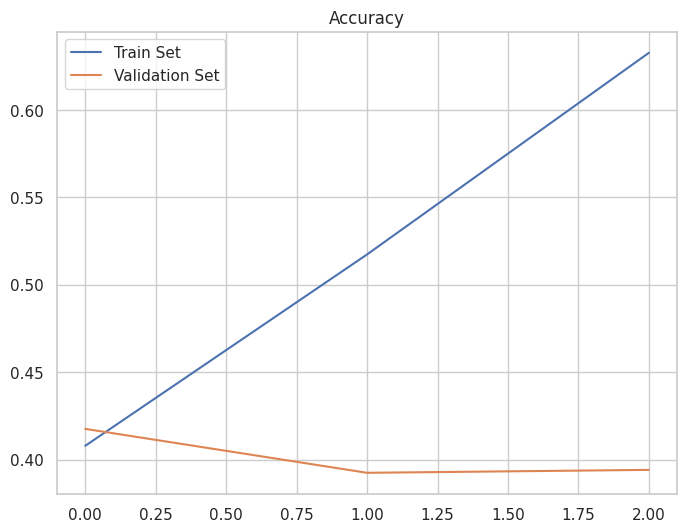

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Accuracy')
xaxis=np.arange(len(history.history['accuracy']))
plt.plot(xaxis, history.history['accuracy'],label='Train Set')
plt.plot(xaxis, history.history['val_accuracy'],label='Validation Set')
plt.legend()

In [ ]:
#DNN Model

In [ ]:
print('DNN model')
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# config model
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training model
history2=model.fit(x_train42_seq, y_train, batch_size=64, epochs=20, validation_data=(x_test42_seq, y_test))

DNN model
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 300)           18000000  
                                                                 
 flatten_1 (Flatten)         (None, 6000)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               3072512   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 1)      

In [ ]:
# testing DNN model
score, accuracy = model.evaluate(x_test42_seq, y_test)
print('Test_accuracy: {}, Test_loss: {}'.format(accuracy, score))

57/57 [==============================] - 1s 15ms/step - loss: -89.9587 - accuracy: 0.3530
Test_accuracy: 0.35303959250450134, Test_loss: -89.95870971679688


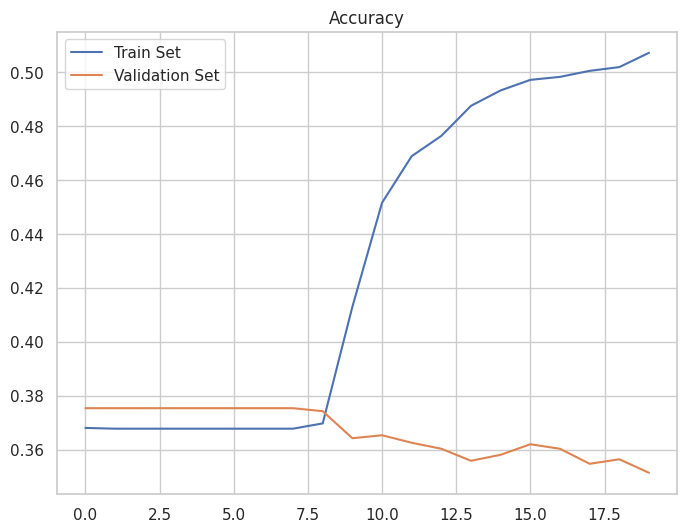

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Accuracy')
xaxis=np.arange(len(history2.history['accuracy']))
plt.plot(xaxis, history2.history['accuracy'],label='Train Set')
plt.plot(xaxis, history2.history['val_accuracy'],label='Validation Set')
plt.legend()

# Classification with replacing the emojis with their descriptive names

In [ ]:
# classification with emojis' descriptive names
x_train43 = train['Text_emojiname'].to_list()
x_test43 = test['Text_emojiname'].to_list()

print(len(x_train43),len(x_test43))

7168 1793


In [ ]:
# encode the words
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(x_train43)
print(tokenizer.texts_to_sequences([x_train43[0]]))
x_train43_seq = text_sequence_processing(tokenizer, x_train43)

tokenizer.fit_on_texts(x_test43)
print(tokenizer.texts_to_sequences([x_test43[0]]))
x_test43_seq = text_sequence_processing(tokenizer, x_test43)

print('Loading data...')
print('x_train shape:', x_train43_seq.shape)
print('x_train shape:', x_test43_seq.shape)
text_sequence_processing(tokenizer, x_train43[:2])

[[21, 40, 234, 25, 11, 2, 3, 13]]
[[132, 332, 10, 692, 89, 349, 4460, 15, 38, 1724, 800, 11, 2]]
Loading data...
x_train shape: (7168, 20)
x_train shape: (1793, 20)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,
         39, 223,  25,  12,   2,   3,  13],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
         17, 630,  17,  12,   2,   3,  13]], dtype=int32)

In [ ]:
# LSTM model
print('Build LSTM model...')

model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 300, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation= 'softmax')
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics = ['accuracy']
)


# run lstm model
# the model, with training set, validation set
h = model.fit(
    x_train43_seq, y_train,
    validation_data=( x_test43_seq, y_test,),
    epochs=10,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

# testing model
score, accuracy = model.evaluate(x_test43_seq, y_test)
print('Test accuracy: {}, Test loss: {}'.format(accuracy, score))


Build LSTM model...
Epoch 1/10
224/224 [==============================] - 31s 107ms/step - loss: 0.2919 - accuracy: 0.9083 - val_loss: 1.4322 - val_accuracy: 0.7328
Epoch 2/10
224/224 [==============================] - 31s 137ms/step - loss: 0.0055 - accuracy: 0.9996 - val_loss: 1.5529 - val_accuracy: 0.7953
Epoch 3/10
224/224 [==============================] - 23s 103ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.5939 - val_accuracy: 0.7719
Epoch 4/10
57/57 [==============================] - 1s 10ms/step - loss: 1.7206 - accuracy: 0.7674
Test accuracy: 0.7674288749694824, Test loss: 1.7205522060394287


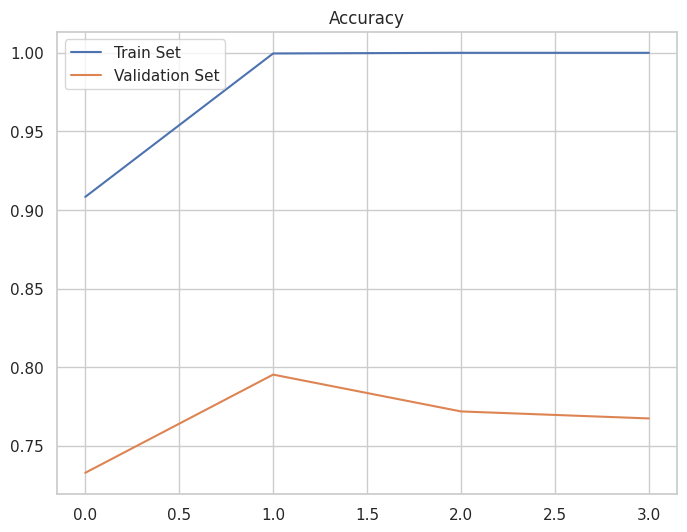

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Accuracy')
xaxis=np.arange(len(h.history['accuracy']))
plt.plot(xaxis, h.history['accuracy'],label='Train Set')
plt.plot(xaxis, h.history['val_accuracy'],label='Validation Set')
plt.legend()

In [ ]:
# DNN


print('Build DNN model...')
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# config model
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training model
h2=model.fit(x_train43_seq, y_train, batch_size=64, epochs=20, validation_data=(x_test43_seq, y_test))

Build DNN model...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 300)           18000000  
                                                                 
 flatten_2 (Flatten)         (None, 6000)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               3072512   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None,

In [ ]:
# testing DNN model
score, accuracy = model.evaluate(x_test43_seq, y_test)
print('Test accuracy: {}, Test loss: {}'.format(accuracy, score))

57/57 [==============================] - 1s 9ms/step - loss: -216.6163 - accuracy: 0.6102
Test accuracy: 0.6101505756378174, Test loss: -216.6162567138672


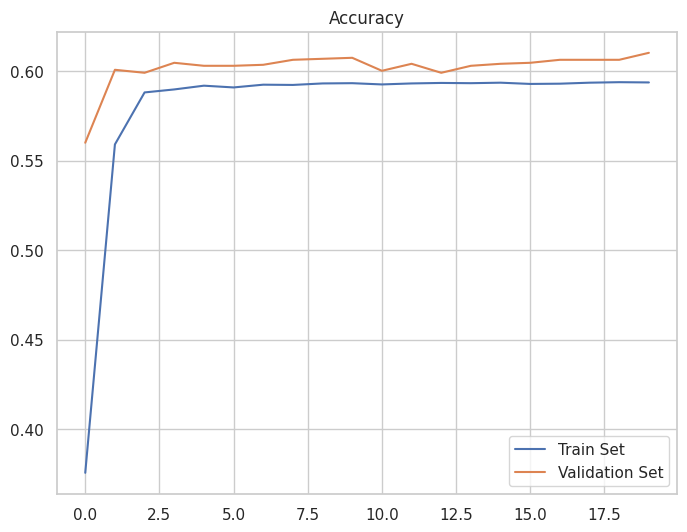

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Accuracy')
xaxis=np.arange(len(h2.history['accuracy']))
plt.plot(xaxis, h2.history['accuracy'],label='Train Set')
plt.plot(xaxis, h2.history['val_accuracy'],label='Validation Set')
plt.legend()

# VADER

In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [ ]:
pip install vaderSentiment

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
# Install and import nltk
!pip install nltk
import nltk

# Download the lexicon
nltk.download("vader_lexicon")
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sent_analyzer = SentimentIntensityAnalyzer()

# Define the predict_sentiment function
def predict_sentiment(text):
    # Ensure that the text is a string
    text = str(text)
    output_dict = sent_analyzer.polarity_scores(text)
    return format_output(output_dict)


In [ ]:
def format_output(output_dict):
    if(output_dict['compound']>= 0.05):
        polarity = "positive"

    elif(output_dict['compound']<= -0.05):
        polarity = "negative"

    else:
        polarity = "neutral"

    return polarity

def predict_sentiment(text):

    output_dict =  sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

In [ ]:
df['Emoji_Text_Label'] = df['Emoji_Label'].replace({0:'neutral', 1:'negative', 2:'positive'})

In [ ]:
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label,Text_emojiname,newText,Emoji_Text_Label
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜,😜,2,sorry education winking face with tongue,sorry education,positive
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know,😭,1,pillow talking dead loudly crying face let know,pillow talking dead let know,negative
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...,😂,2,saw s shoe face with tears of joy poor boy s...,saw s shoe poor boy saying seen better sh...,positive
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe,😕,0,convinced u dont confused face u bout doe,convinced u dont u bout doe,neutral
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜,😜,2,spooning girl winking face with tongue,spooning girl,positive


In [ ]:
df["vader_prediction"] =df["Text_emojiname"].apply(predict_sentiment)

In [ ]:
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1', trainable=True)

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
token_lens = []

for txt in df['Text_emojiname'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [ ]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 30


In [ ]:
token_lens = []

for i,txt in enumerate(df['Text_emojiname'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

In [ ]:
df['token_lens'] = token_lens

In [ ]:
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label,Text_emojiname,newText,Emoji_Text_Label,vader_prediction,token_lens
1533,come twitter roll eye screw people s hypocriti...,😂,joy,i do when i come on twitter is roll my eyes an...,come twitter roll eye screw people s hypocriti...,😂,2,come twitter roll eye screw people s hypocriti...,come twitter roll eye screw people s hypocriti...,positive,positive,30
3173,hate pee yellow like drink water n tea n soon ...,😡,anger,hate when my pee is yellow like i only drink ...,hate pee yellow like drink water n tea n soon ...,😡,1,hate pee yellow like drink water n tea n soon ...,hate pee yellow like drink water n tea n soon ...,negative,positive,24
60,beard growing product laugh 😂 got ta eat pus...,😂,joy,these beard growing products make me laugh yo...,beard growing product laugh 😂 got ta eat p...,😂,2,beard growing product laugh face with tears o...,beard growing product laugh got ta eat pu...,positive,positive,25
5888,told tweet hater gon na hate 😜 player gon na...,😜,joy,no one has told you to tweet about them stfu ...,told tweet hater gon na hate 😜 player gon ...,😜,2,told tweet hater gon na hate winking face wit...,told tweet hater gon na hate player gon n...,positive,negative,25
2409,got hit grocery shopping cute as trader joe s ...,😜,joy,got hit on by a dilf who was grocery shopping ...,got hit grocery shopping cute as trader joe s ...,😜,2,got hit grocery shopping cute as trader joe s ...,got hit grocery shopping cute as trader joe s ...,positive,positive,24


In [ ]:
df = df.sort_values(by='token_lens', ascending=False)
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label,Text_emojiname,newText,Emoji_Text_Label,vader_prediction,token_lens
1533,come twitter roll eye screw people s hypocriti...,😂,joy,i do when i come on twitter is roll my eyes an...,come twitter roll eye screw people s hypocriti...,😂,2,come twitter roll eye screw people s hypocriti...,come twitter roll eye screw people s hypocriti...,positive,positive,30
60,beard growing product laugh 😂 got ta eat pus...,😂,joy,these beard growing products make me laugh yo...,beard growing product laugh 😂 got ta eat p...,😂,2,beard growing product laugh face with tears o...,beard growing product laugh got ta eat pu...,positive,positive,25
5888,told tweet hater gon na hate 😜 player gon na...,😜,joy,no one has told you to tweet about them stfu ...,told tweet hater gon na hate 😜 player gon ...,😜,2,told tweet hater gon na hate winking face wit...,told tweet hater gon na hate player gon n...,positive,negative,25
3173,hate pee yellow like drink water n tea n soon ...,😡,anger,hate when my pee is yellow like i only drink ...,hate pee yellow like drink water n tea n soon ...,😡,1,hate pee yellow like drink water n tea n soon ...,hate pee yellow like drink water n tea n soon ...,negative,positive,24
2409,got hit grocery shopping cute as trader joe s ...,😜,joy,got hit on by a dilf who was grocery shopping ...,got hit grocery shopping cute as trader joe s ...,😜,2,got hit grocery shopping cute as trader joe s ...,got hit grocery shopping cute as trader joe s ...,positive,positive,24


In [ ]:
df = df.iloc[12:]
df.head()

,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label,Text_emojiname,newText,Emoji_Text_Label,vader_prediction,token_lens
2264,kill m sick pervert hurting innocent s depravi...,😡,anger,just kill them i m sick of perverts hurting t...,kill m sick pervert hurting innocent s depravi...,😡,1,kill m sick pervert hurting innocent s depravi...,kill m sick pervert hurting innocent s depravi...,negative,negative,21
6910,m gon na t know s like poop real toilet s toil...,😂,joy,i m gonna say is you don t know what it s like...,m gon na t know s like poop real toilet s toil...,😂,2,m gon na t know s like poop real toilet s toil...,m gon na t know s like poop real toilet s toilet,positive,positive,21
5470,gon na perform think gon na surprise performan...,😕,sad,is gonna perform dna and i think fire is gonna...,gon na perform think gon na surprise performan...,😕,0,gon na perform think gon na surprise performan...,gon na perform think gon na surprise performan...,neutral,negative,21
2990,wan na drunk tonight m definitely gon na drunk...,😜,joy,wanna get drunk tonight and i m definitely gon...,wan na drunk tonight m definitely gon na drunk...,😜,2,wan na drunk tonight m definitely gon na drunk...,wan na drunk tonight m definitely gon na drunk...,positive,negative,20
3042,spa date thing spa want try want know e work s...,😜,joy,spa dates a thing i ve never been to a spa an...,spa date thing spa want try want know e work s...,😜,2,spa date thing spa want try want know e work s...,spa date thing spa want try want know e work s...,positive,positive,20


In [ ]:
import numpy as np
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


In [ ]:

# Detect hardware, return appropriate distribution strategy (you can see that it is pretty easy to set up).
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set (always set in Kaggle)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
except ValueError:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [ ]:
MODEL_NAME = 'roberta-base'
MAX_LEN = 256
ARTIFACTS_PATH = '../artifacts/'

BATCH_SIZE = 10 * strategy.num_replicas_in_sync

EPOCHS = 3

if not os.path.exists(ARTIFACTS_PATH):
    os.makedirs(ARTIFACTS_PATH)

In [ ]:
data = df.head(2000)
data.reset_index(drop=True, inplace=True)
data.head()


,CleanTweets,Emojis,Emoji_Type,onlytext,Splitted,concerned_emojis,Emoji_Label,Text_emojiname,newText,Emoji_Text_Label
0,sorry education 😜,😜,joy,sorry for bringing education into it,sorry education 😜,😜,2,sorry education winking face with tongue,sorry education,positive
1,pillow talking dead 😭 let know,😭,sad,that pillow talking shit dead fr let me know ...,pillow talking dead 😭 let know,😭,1,pillow talking dead loudly crying face let know,pillow talking dead let know,negative
2,saw s shoe 😂 poor boy saying seen better shr...,😂,joy,i saw was helga rescuing gerald s shoe the po...,saw s shoe 😂 poor boy saying seen better s...,😂,2,saw s shoe face with tears of joy poor boy s...,saw s shoe poor boy saying seen better sh...,positive
3,convinced u dont 😕 u bout doe,😕,sad,im convinced u dont get enough but u talkin b...,convinced u dont 😕 u bout doe,😕,0,convinced u dont confused face u bout doe,convinced u dont u bout doe,neutral
4,spooning girl 😜,😜,joy,must be spooning velcro girl so,spooning girl 😜,😜,2,spooning girl winking face with tongue,spooning girl,positive


In [ ]:
X_data = data[['Splitted']].to_numpy().reshape(-1)
y_data = data[['Emoji_Text_Label']].to_numpy().reshape(-1)

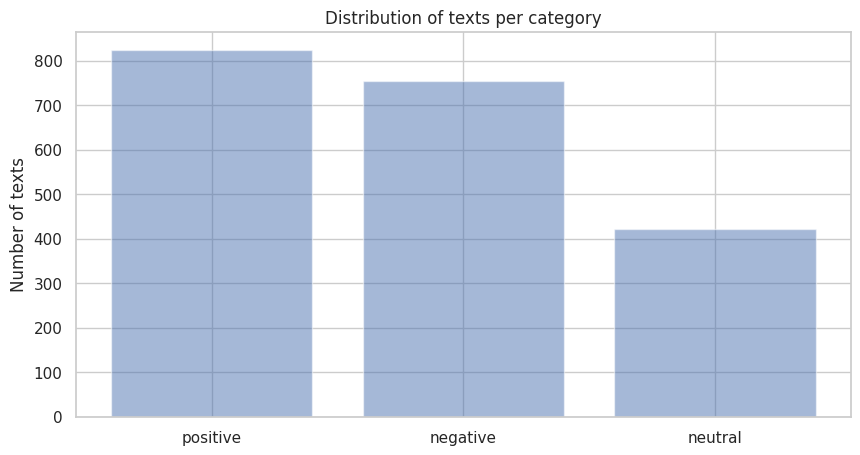

Counter({'positive': 824, 'negative': 755, 'neutral': 421})


In [ ]:
categories = data[['Emoji_Text_Label']].values.reshape(-1)

counter_categories = Counter(categories)
category_names = counter_categories.keys()
category_values = counter_categories.values()

y_pos = np.arange(len(category_names))

plt.figure(1, figsize=(10, 5))
plt.bar(y_pos, category_values, align='center', alpha=0.5)
plt.xticks(y_pos, category_names)
plt.ylabel('Number of texts')
plt.title('Distribution of texts per category')
plt.gca().yaxis.grid(True)
plt.show()

print(counter_categories)

In [ ]:
def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        # Tokenize
        tok_text = tokenizer.tokenize(text)

        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])

        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN

        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')

        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [ ]:
# Transform categories into numbers
category_to_id = {}
category_to_name = {}

for index, c in enumerate(y_data):
    if c in category_to_id:
        category_id = category_to_id[c]
    else:
        category_id = len(category_to_id)
        category_to_id[c] = category_id
        category_to_name[category_id] = c

    y_data[index] = category_id

# Display dictionary
category_to_name

{0: 'positive', 1: 'negative', 2: 'neutral'}

In [ ]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=777)

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
def calculate_stats(data, split_char=' '):
    categories = data['Emoji_Text_Label'].unique()

    all_lengths = []
    per_category = {
        'lengths': {c:[] for c in categories},
        'mean': {c:0 for c in categories},
        'stdev': {c:0 for c in categories}
    }

    for index, row in df.iterrows():
        text = row['text']
        text = re.sub(r"\s+", ' ', text) # Normalize
        text = text.split(split_char)
        l = len(text)

        category = row['category']

        all_lengths.append(l)
        per_category['lengths'][category].append(l)

    for c in categories:
        per_category['mean'][c] = statistics.mean(per_category['lengths'][c])
        per_category['stdev'][c] = statistics.stdev(per_category['lengths'][c])

    global_stats = {
        'mean': statistics.mean(all_lengths),
        'stdev': statistics.stdev(all_lengths),
        'lengths': all_lengths
    }

    return {
        'global': global_stats,
        'per_category': pd.DataFrame(per_category)
    }


def display_lengths_histograms(df_stats, n_cols=3):
    categories = df['category'].unique()
    n_rows = math.ceil(len(categories) / n_cols)

    plt.figure(figsize=(15, 8))
    plt.suptitle('Distribution of lengths')

    # Subplot of all lengths
    plt.subplot(n_rows, n_cols, 1)
    plt.title('All categories')
    lengths = df_stats['global']['lengths']
    plt.hist(lengths, color='r')

    # Subplot of each category
    index_subplot = 2
    for c in categories:
        plt.subplot(n_rows, n_cols, index_subplot)
        plt.title('Category: %s' % c)

        lengths = df_stats['per_category']['lengths'][c]
        plt.hist(lengths, color='b')

        index_subplot += 1

    plt.show()

In [ ]:
n_texts = len(X_data)
print('Texts in dataset: %d' % n_texts)

categories = data['Emoji_Text_Label'].unique()
n_categories = len(categories)
print('Number of categories: %d' % n_categories)

print('Done!')

Texts in dataset: 2000
Number of categories: 3
Done!


In [ ]:
X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)

y_train = np.asarray(y_train, dtype='int32')
y_test = np.asarray(y_test, dtype='int32')

In [ ]:
def build_model(n_categories):
    with strategy.scope():
        input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
        input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
        input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

        # Import RoBERTa model from HuggingFace
        roberta_model = TFRobertaModel.from_pretrained(MODEL_NAME)
        x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

        # Huggingface transformers have multiple outputs, embeddings are the first one,
        # so let's slice out the first position
        x = x[0]

        x = tf.keras.layers.Dropout(0.1)(x)
        x = tf.keras.layers.Flatten()(x)
        x = tf.keras.layers.Dense(256, activation='relu')(x)
        x = tf.keras.layers.Dense(n_categories, activation='softmax')(x)

        model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(lr=1e-5),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        return model

In [ ]:
with strategy.scope():
    model = build_model(n_categories)
    model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 256)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                              

In [ ]:
with strategy.scope():
    print('Training...')
    history = model.fit(X_train,
                        y_train,
                        epochs=3,
                        batch_size=BATCH_SIZE,
                        verbose=1,
                        validation_data=(X_test, y_test))

Training...
Epoch 1/3


140/140 [==============================] - 5655s 40s/step - loss: 4.4673 - accuracy: 0.3871 - val_loss: 1.0897 - val_accuracy: 0.4150
Epoch 2/3
140/140 [==============================] - 5393s 39s/step - loss: 1.1083 - accuracy: 0.4107 - val_loss: 1.0781 - val_accuracy: 0.4150
Epoch 3/3
140/140 [==============================] - 5361s 38s/step - loss: 1.0782 - accuracy: 0.4107 - val_loss: 1.0700 - val_accuracy: 0.4150


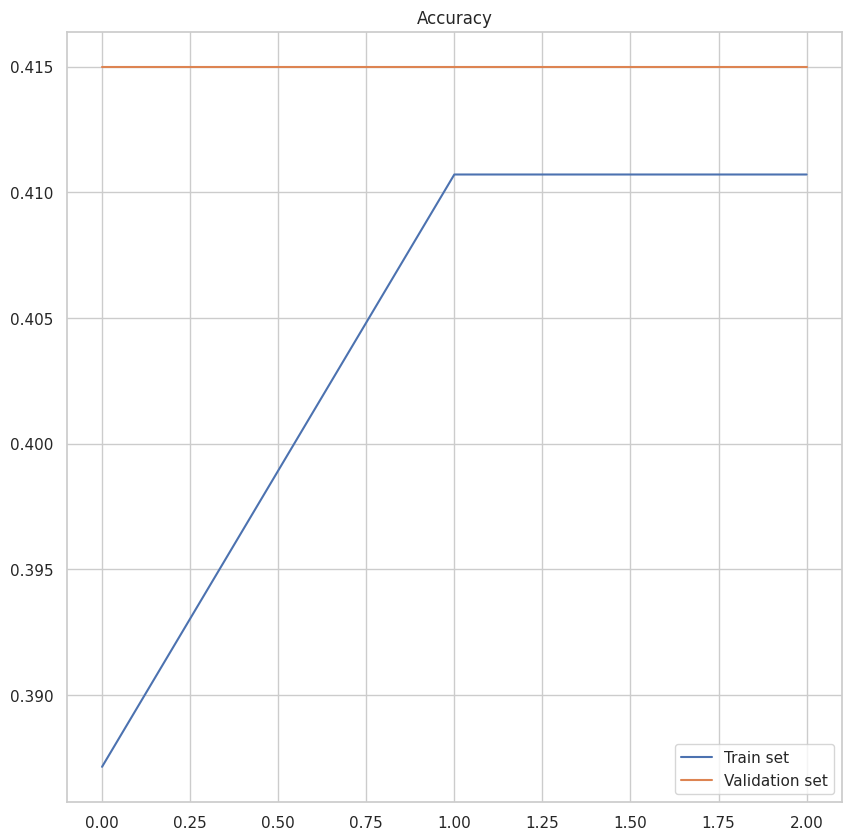

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Accuracy')
xaxis = np.arange(len(history.history['accuracy']))
plt.plot(xaxis, history.history['accuracy'], label='Train set')
plt.plot(xaxis, history.history['val_accuracy'], label='Validation set')
plt.legend()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 41.50%
